### Bitcoin News / Price correlation 

I was curious what drives the Bitcoin price and if and how Google search terms are related. Specially the year 2017 was considered for this analysis. As data analysis is a really helpful skill I learned a lot while combining some data sources. Enjoy.

Date of analysis: 08 March 2018

#### Ressources

https://data.bitcoinity.org/markets/price/all/USD?c=e&t=l

https://trends.google.de/trends/explore?q=bitcoin,price,buy

#### Other links and analysis

https://github.com/bishoph/machine_learning/blob/master/prophet/Bitcoin.ipynb


In [1]:
import pandas as pd
import numpy
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

Calculating the timespan for the analysis

In [3]:
row_count = (365*8)+30

Creating the value object

In [4]:
start_date = pd.Timestamp('2010-01-01')
dtype = [('ds', 'object'), ('price', 'float64'), ('news', 'int32'), ('searchterm_bitcoin', 'float32'), ('searchterm_buy', 'int32'), ('searchterm_price', 'int32')]
values = numpy.zeros(row_count, dtype=dtype)
for x in range(0, len(values)):
    values[x][0] = start_date + datetime.timedelta(days=x)
    values[x][1] = None
    values[x][2] = 0
    values[x][3] = 0
    values[x][4] = 0
    values[x][5] = 0

Creating the data object

In [5]:
data_object = pd.DataFrame(values, columns=['ds', 'price', 'news', 'searchterm_bitcoin', 'searchterm_buy', 'searchterm_price'])

Loading trade data

In [6]:
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S %Z').replace(hour=0, minute=0, second=0, microsecond=0) for d in dates]
td = pd.read_csv('bitcoin_trade_data_combined.CSV', parse_dates=['ds'], date_parser=dateparse, usecols=['ds', 'y'])

Preparing the price...

In [7]:
for i, row in td.iterrows():
    dri = (row['ds'] - start_date).days
    data_object['price'][dri] = row['y']

In [8]:
delete_rows = [ ]
for i, row in data_object.iterrows():
    if (isinstance( row['price'], pd.tslib.NaTType)):
        delete_rows.append(i)

In [9]:
for d in delete_rows:
    data_object.drop(d, inplace=True)

Plotting the Bitcoin price chart

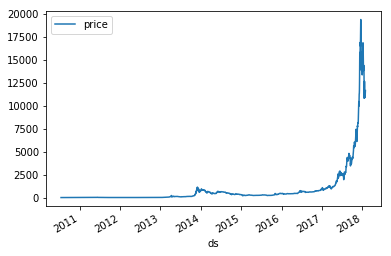

In [22]:
data_object.plot(x='ds', y='price')

In [11]:
search_term_data_frame = pd.read_csv('bitcoin_price_buy_google_trends.csv',
                                     parse_dates=['week'],
                                     usecols=['week', 'bitcoin', 'buy', 'price'])

In [12]:
for i, row in search_term_data_frame.iterrows():
    dri = (row['week'] - start_date).days
    data_object['searchterm_bitcoin'][dri] = row['bitcoin']
    data_object['searchterm_buy'][dri] = row['buy']
    data_object['searchterm_price'][dri] = row['price']

Visualize the search terms from March 2017 till end of data

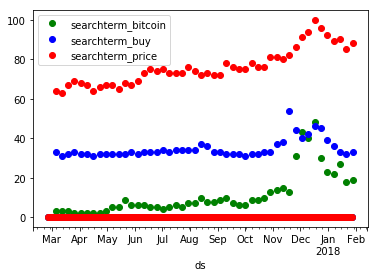

In [13]:
data_object[2600:].plot(x='ds', 
                 y=['searchterm_bitcoin', 'searchterm_buy', 'searchterm_price'],
                 style=['go', 'bo', 'ro'],
                 logy=False)

Let's drill even a bit deeper and visualize May 2017 till Feb 2018

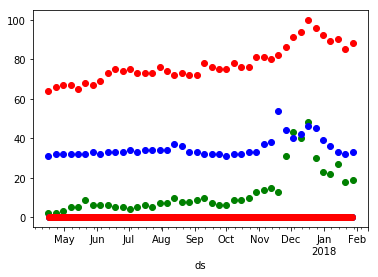

In [14]:
data_object[2650:3000].plot(x='ds',
                 y=['searchterm_bitcoin', 'searchterm_buy', 'searchterm_price'],
                 style=['go', 'bo', 'ro'],
                 logy=False,
                 legend=False)

What we see is this:

1. Increase for "buy" (blue) search term beginning of October
2. Increase for "bitcoin" (green) search term started end of May
3. Search for "price" (red) started to go up around June and peaked mid December

Now let's incorporate the Bitcoin price into the picture with a nice scale

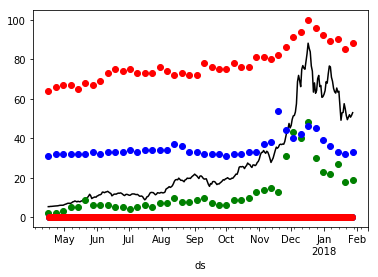

In [15]:
data_object['scaledprice'] = data_object['price'].map(lambda x: x / 220)
data_object[2650:3000].plot(x='ds',
                 y=['scaledprice', 'searchterm_bitcoin', 'searchterm_buy', 'searchterm_price'],
                 style=['k', 'go','bo', 'ro'],
                 logy=False,
                 legend=False)

This makes a lot of sense to me. FOMO (fear of missing out) started somewhere in mid of 2017 and attracts new buyers to come in. Those new users searching where and how to buy and the now increased number of users is checking the price until the ATH (all time high). 

But what was the driver? Let's add another data source: News

In [16]:
data_frame_news_occurrences = pd.read_json('bitcoin_timestamp_occurence.json')

In [17]:
no = 0.0
for i, row in data_frame_news_occurrences.iterrows():
    rd =  pd.Timestamp(row[0][0:10])
    dri = (rd - start_date).days
    data_object['news'][dri] += no
    no += 1

We sum up the data to show when Bitcoin was in the news

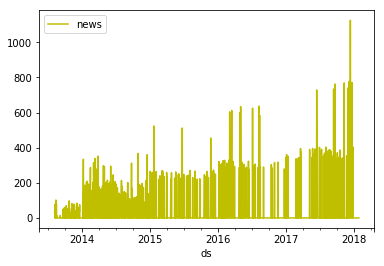

In [18]:
data_object[1300:].plot(x='ds', y='news', style=['y-'])

Let's digg deeper and check if we notice an increase of news occurrences in the year 2017

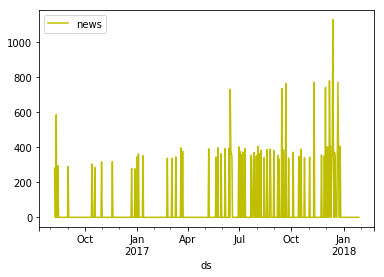

In [19]:
data_object[2400:].plot(x='ds', y='news', style=['y-'])

There you go. May 2017 news rate kicks in and this correlates nicely with the shown search terms.

As a picture tells more than words here is the correlation between news and Bitcoin price:

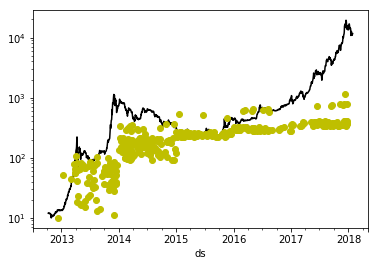

In [20]:
data_object[1000:].plot(x='ds',
                 y=['price', 'news'],
                 style=['k', 'yo'],
                 logy=True,
                 legend=False)

Let's see if we can proof this by looking at peaks from the past. Let's use the December 2014 peak:

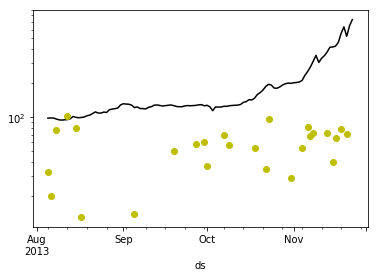

In [21]:
data_object[1300:1410].plot(x='ds',
                 y=['price', 'news'],
                 style=['k', 'yo'],
                 logy=True,
                 legend=False)

Not too useful to be honest. In the future we should use more and more detailed data and use categorized news to match up-/and downtrends.

Final thoughts, insight and outcome:

* Bitcoin in the news drives Bitcoin price
* Good and powerful news drives demand and therefore the price
* Google search for "Bitcoin" is a result of Bitcoin being in the news
* New users search for information how and where to buy, price info etc.
* Maybe Bitcoin should get a marketing team